 <font size="5"><b>Исследование аренды самокатов GoFast</b></font><br />
    
Переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* **без подписки**
 * абонентская плата отсутствует;
 * стоимость одной минуты поездки — 8 рублей;
 * стоимость старта (начала поездки) — 50 рублей;
* **с подпиской Ultra**
 * абонентская плата — 199 рублей в месяц;
 * стоимость одной минуты поездки — 6 рублей;
 * стоимость старта — бесплатно.

**Цель исследования**
1. **Провести исследовательский анализ по следующим параметрам:**
* частота встречаемости городов;
* соотношение пользователей с подпиской и без подписки;
* возраст пользователей;
* расстояние, которое пользователь преодолел за одну поездку;
* продолжительность поездок.

2.  **Подсчёт выручки** 
* найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

3. **Проверка гипотез**
* тратят ли пользователи с подпиской больше времени на поездки?
* можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
* будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
* какой тест понадобится  для проверки гипотезы о снижении кол-ва обращений в ТП после обновления сервиса?

**План исследования**

1 Загрузка данных

2 Предобработка данных

    2.1 привести столбец date к типу данных pandas
    2.2 создать новый столбец с номером месяца
    2.3 проверить наличие пропущенных значений
3 Исследовательский анализ

    3.1 частота встречаемости городов;
    3.2 соотношение пользователей с подпиской и без подписки;
    3.3 возраст пользователей;
    3.4 расстояние, которое пользователь преодолел за одну поездку;
    3.5 продолжительность поездок.
4 Объединение данных 

    4.1 объединение данных о пользователях, поездках и подписках в один датафрейм
    4.2 создание двух датафреймов из датафрейма, созданного на предыдущем этапе
    4.3 визуализиция информации о расстоянии и времени поездок для пользователей обеих категорий
5 Подсчет выручки
    
    5.1 рассчет суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц
6 Проверка гипотез

    6.1 тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки
    6.2 превышают ли пользователи с подпиской за одну поездку расстояние оптимальное для износа самоката в 3130 метров
    6.3 помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
    6.4 тест для проверки гипотетзы о снижении кол-ва обращений в ТП после обновления сервиса

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### Шаг 1. Загрузка данных

In [19]:
rides_data = pd.read_csv('/datasets/rides_go.csv')
users_data = pd.read_csv('/datasets/users_go.csv')
subs_data = pd.read_csv('/datasets/subscriptions_go.csv')

In [20]:
rides_data.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [21]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [22]:
users_data.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [23]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [24]:
subs_data

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [25]:
subs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Пропущенные значения в исходных данных отсутсвуют. Два датасета rides_data и rides_data имеют общий столбец user_id, по которому их можно объедеинить.

#### Шаг 2. Предобработка данных

##### Приводим столбец date к типу даты pandas

In [26]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')

In [27]:
rides_data['date'].sort_values()

0       2021-01-01
13113   2021-01-01
5445    2021-01-01
12775   2021-01-01
17096   2021-01-01
           ...    
15325   2021-12-30
7541    2021-12-30
6115    2021-12-30
10991   2021-12-30
11778   2021-12-30
Name: date, Length: 18068, dtype: datetime64[ns]

В датафрейме содержаться данные только 2021 год, нет необходимости объединения их по одинаковым периодам для анализа.

##### Создаем новый столбец с номером месяца на основе столбца date

In [28]:
rides_data['month'] = rides_data['date'].dt.month

##### Проверка наличия пропущенных значений и дубликатов в датафреймах

In [29]:
rides_data.duplicated().sum() # поиск дубликатов из первого датасета

0

In [30]:
rides_data.isna().sum() # поиск пропущенных значений из первого датасета

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [31]:
users_data.duplicated().sum() # поиск дубликатов из второго датасета

31

In [32]:
users_data = users_data.drop_duplicates() # удаление дубликатов

In [33]:
users_data = users_data.reset_index(drop=True) # сброс индексов

In [34]:
users_data.isna().sum() # поиск пропущенных значений из второго датасета

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [35]:
subs_data.duplicated().sum() # поиск дубликатов из третьего датасета

0

In [36]:
subs_data.isna().sum() # поиск пропущенных значений из третьего датасета

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

___Проверка данных на аномалии___

In [37]:
# Показатели о расстоянии и длительности за одну поездку, минимальные и максимальные значения
(
    rides_data[['distance', 'duration']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,distance,duration
count,"18,068.00","18,068.00"
min,0.86,0.50
max,"7,211.01",40.82


In [38]:
# Значения параметров расстояния и длительности поездок на разных квантилях
(
    rides_data[['distance', 'duration']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,distance,duration
0.0012,36.38,0.50
0.01,208.08,3.98
0.5,"3,133.61",17.68
0.99,"5,478.62",32.50
0.9988,"6,251.50",35.43


**Вывод:** Найден и устранен 31 дубликат в датасете users_data. Аномалий на квантилях с размахом в 0,9976 не обнаружено. Неправдоподобных значений в  минимальных и максимальных расстояниях и длительностях поездок не найдено. Исходные данные пригодны для анализа.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [39]:
users_data['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [40]:
users_data_city = users_data.groupby('city').agg({'city':'count'})

In [41]:
users_data_city.columns = ['count'] # переименовываем столбец 'city'

In [42]:
users_data_city = users_data_city.sort_values('count', ascending=False).reset_index() # частота встречаемости городов

In [43]:
users_data_city

,city,count
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


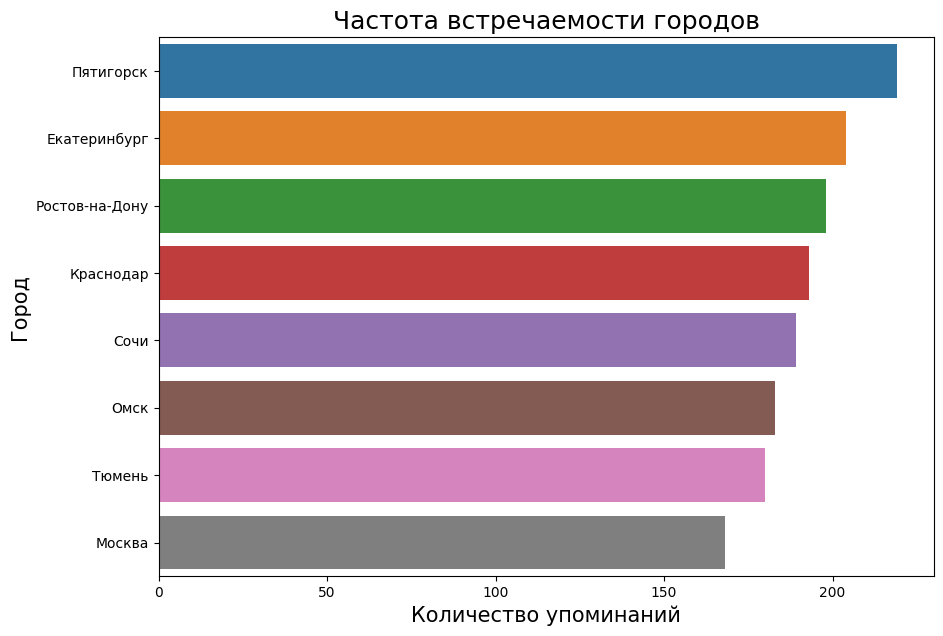

In [44]:
# построение графика
plt.figure(figsize=(10,7))
sns.barplot(x='count', 
            y='city', 
            data=users_data_city);

# устанавливаем метки
plt.xlabel('Количество упоминаний', size=15)
plt.ylabel('Город', size=15)
plt.title('Частота встречаемости городов', size=18);

Пятигорск самый часто встречайщийся город в датасете, Москва - самый менее встречающийся.

##### Соотношение пользователей с подпиской и без подписки

In [45]:
users_data_subs = users_data.groupby('subscription_type').agg({'subscription_type':'count'})

In [46]:
users_data_subs.columns = ['count'] # переименовываем столбец 'subscription_type'

In [47]:
users_data_subs

,count
subscription_type,
free,835
ultra,699


In [48]:
# добавим столбец процентного соотношения
users_data_subs['percentage'] = round(users_data_subs['count'] / users_data_subs['count'].sum() * 100)

In [49]:
users_data_subs

,count,percentage
subscription_type,,
free,835,54.0
ultra,699,46.0


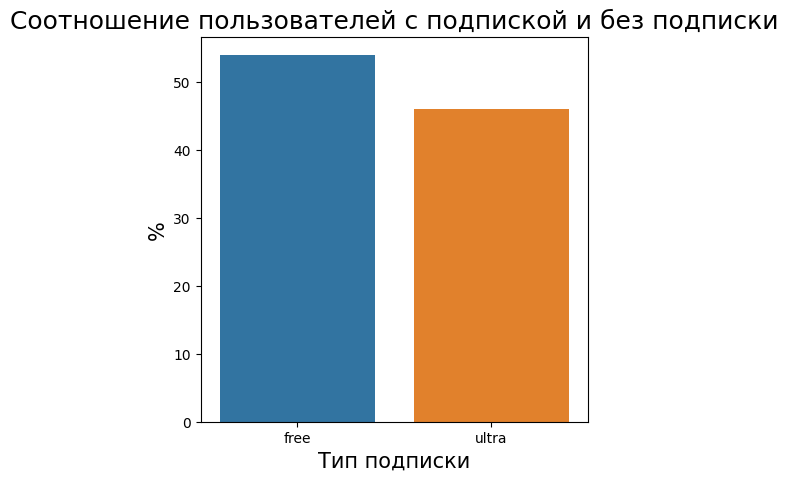

In [50]:
# строим график
plt.figure(figsize=(5,5))
sns.barplot(data=users_data_subs, x = users_data_subs.index, y = users_data_subs['percentage']);

# устанавливаем метки
plt.xlabel('Тип подписки', size=15)
plt.ylabel('%', size=15)
plt.title('Соотношение пользователей с подпиской и без подписки', size=18);

Пользователей с тарифом free 54%, с тарифом ultra - 46%.

##### Возраст пользователей

In [51]:
# Минимальный и максимальный возраст
users_data[['age']].apply(['min', 'max'])

,age
min,12
max,43


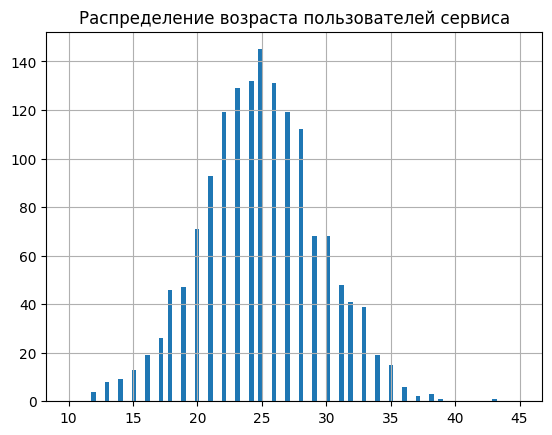

In [52]:
users_data[['age']].hist(bins = 100, range = (10, 45));
plt.title('Распределение возраста пользователей сервиса');

Возраст пользователей от 12 до 43 лет, средний возраст - 25 лет. Распределение на графике похоже на нормальное.

##### Расстояние, которое пользователь преодолел за одну поездку

In [53]:
rides_data

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [54]:
# среднее расстояние за одну поездку по каждому пользователю
rides_data_dist = rides_data.pivot_table(index='user_id', values='distance', aggfunc='median')

In [55]:
# добавляем столбец 'distance_km', переводим м в км
#rides_data_dist['distance_km'] = round(rides_data_dist['distance'] / 1000)

In [56]:
rides_data_dist

,distance
user_id,
1,2806.504429
2,3105.086678
3,2858.693148
4,3373.276987
5,3244.021903
...,...
1530,2724.331740
1531,2999.913238
1532,2615.477834


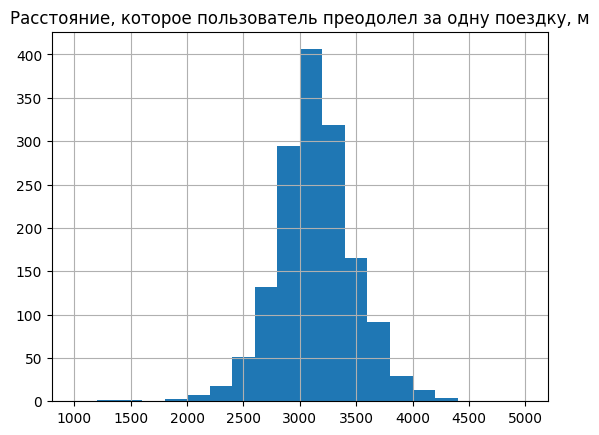

In [57]:
rides_data_dist['distance'].hist(bins = 20, range = (1000, 5000))
plt.title('Расстояние, которое пользователь преодолел за одну поездку, м');

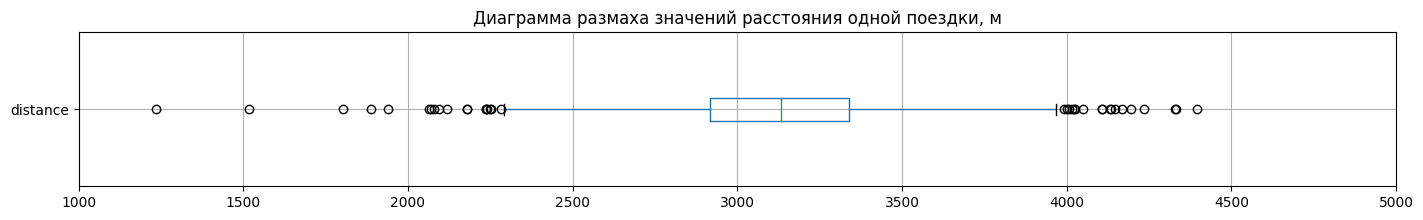

In [58]:
fig, ax = plt.subplots(figsize = (17,2))
ax = rides_data_dist[['distance']].boxplot(vert = False, ax = ax)
ax.set_title('Диаграмма размаха значений расстояния одной поездки, м')
ax.set_xlim(1000, 5000);

В среднем пользователь сервиса преодолевает примерно 3200 м за одну поездку.

##### Продолжительность поездок

In [59]:
rides_data.head(5)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [60]:
# сумарное время по каждому пользователю
rides_data_drt = rides_data.pivot_table(index='user_id', values='duration', aggfunc='sum')

In [62]:
rides_data_drt

,duration
user_id,
1,204.604909
2,197.644279
3,233.193513
4,288.563581
5,174.073932
...,...
1530,292.366839
1531,408.192206
1532,212.160144


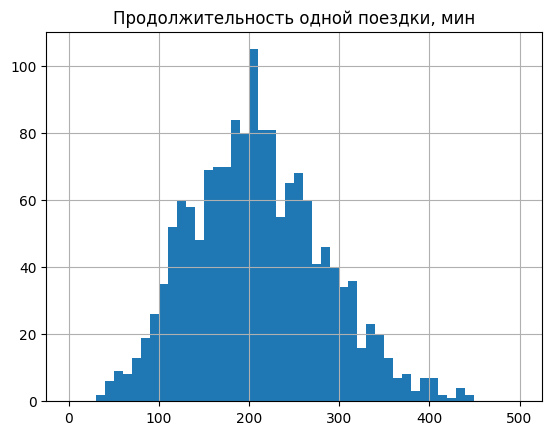

In [63]:
rides_data_drt['duration'].hist(bins = 50, range = (0, 500))
plt.title('Продолжительность одной поездки, мин');

Продолжительность поездок составляет от 40 до 450 мин, чаще всего она длится 210 мин (3.5 часа). Распределение на графике похоже на нормальное.

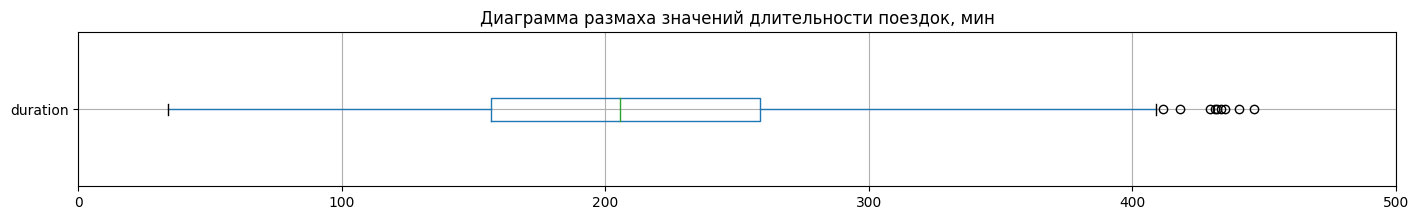

In [64]:
fig, ax = plt.subplots(figsize = (17,2))
ax = rides_data_drt[['duration']].boxplot(vert = False, ax = ax)
ax.set_title('Диаграмма размаха значений длительности поездок, мин')
ax.set_xlim(0, 500);

#### Шаг 4. Объединение данных

##### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [65]:
# количество строк в первом датасете
rides_data.shape[0]

18068

In [66]:
# количество строк в0 втором датасете
users_data.shape[0]

1534

In [67]:
rides_data.head(5)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [68]:
users_data.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [69]:
# объединение датафреймов
df_users_rides = users_data.merge(rides_data, on='user_id', how='outer')

In [70]:
df_users_rides

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [71]:
df_users_rides.shape[0]

18068

Схождение датафреймов по количеству строк оказалось ожидаемым - 18068, как и в первом датафрейме.

##### Создание  двух датафреймов из датафрейма, созданного на этапе 4.1

In [72]:
subs_data.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [73]:
# пользователи с тарифами free и ultra
df_users_rides_subs = df_users_rides.merge(subs_data, on='subscription_type', how='outer')

In [74]:
# пользователи с тарифом free
df_users_rides_free = df_users_rides_subs.query('subscription_type == "free"')

In [75]:
df_users_rides_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [76]:
# пользователи с тарифом ultra
df_users_rides_ultra = df_users_rides_subs.query('subscription_type == "ultra"')

In [77]:
df_users_rides_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


##### Визуализиция информации о расстоянии и времени поездок для пользователей обеих категорий.

In [78]:
# сводная таблица по пользователям с тарифом free - суммарное расстояние и продолжительность поездок
data_users_rides_free = df_users_rides_free.pivot_table(index='user_id', values=['distance', 'duration'], aggfunc='sum')

# сводная таблица по пользователям с тарифом ultra - суммарное расстояние и продолжительность поездок
data_users_rides_ultra = df_users_rides_ultra.pivot_table(index='user_id', values=['distance', 'duration'], aggfunc='sum')

In [79]:
# сброс колонки user_id
data_users_rides_free = data_users_rides_free.reset_index(drop=True)
data_users_rides_ultra = data_users_rides_ultra.reset_index(drop=True)

In [80]:
data_users_rides_free

,distance,duration
0,52202.109773,273.224942
1,62153.018852,289.779073
2,41682.095810,232.031447
3,17382.000502,108.253356
4,50387.129242,266.533655
...,...,...
830,46758.469822,292.366839
831,67054.794222,408.192206
832,33902.203192,212.160144
833,36890.192211,240.580297


In [81]:
data_users_rides_ultra

,distance,duration
0,34070.182066,204.604909
1,33964.058614,197.644279
2,36907.597866,233.193513
3,44837.189916,288.563581
4,35556.949649,174.073932
...,...,...
694,18867.880453,112.181459
695,8887.865471,61.990775
696,24352.719268,167.983339
697,30202.732302,188.930018


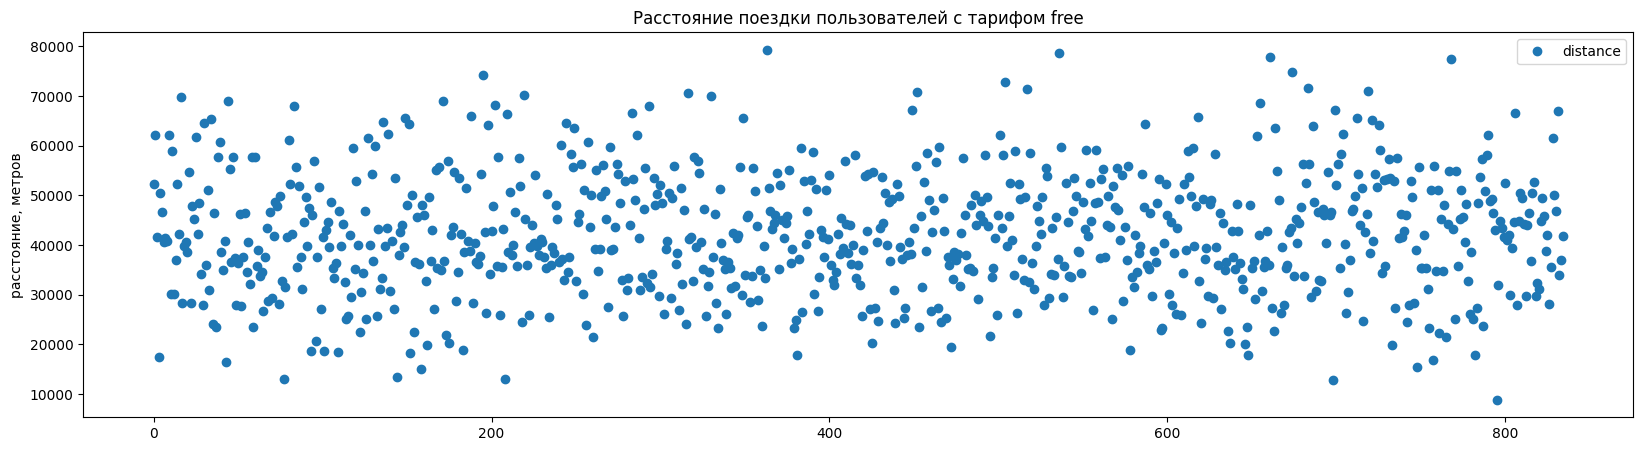

In [82]:
# расстояние поездки пользователей с тарифом free
( data_users_rides_free[['distance']]
 .plot(style='o', figsize=(20, 5), title='Расстояние поездки пользователей с тарифом free')
 .set_ylabel("расстояние, метров")
);

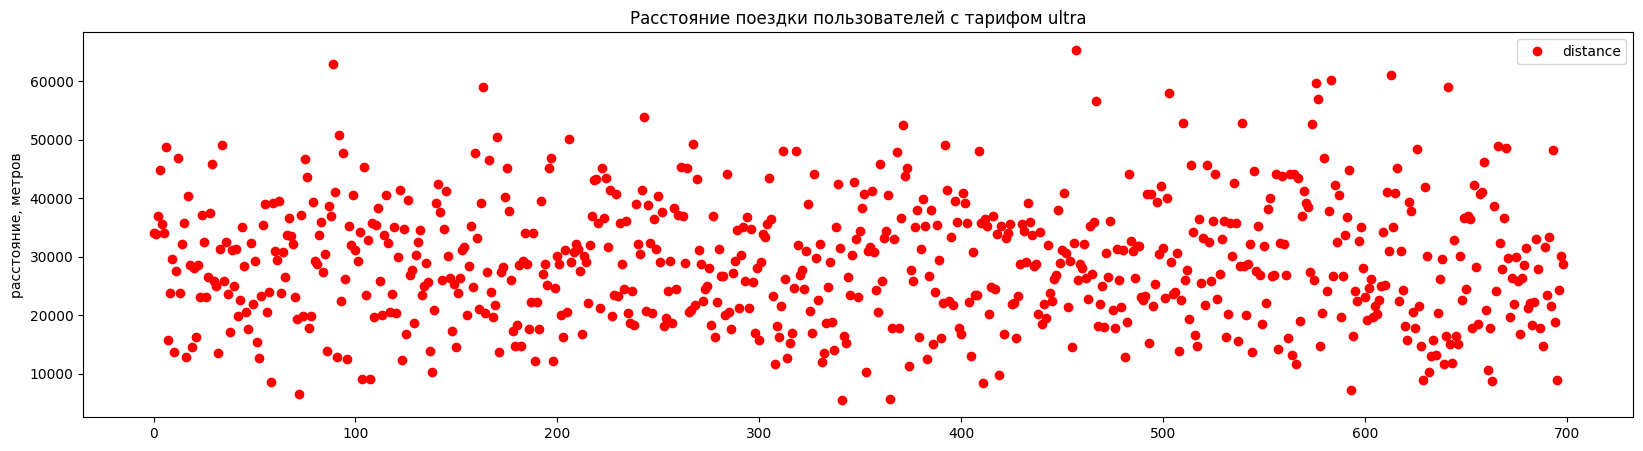

In [83]:
# расстояние поездки пользователей с тарифом ultra
( data_users_rides_ultra[['distance']]
 .plot(style='o', color="red", figsize=(20, 5), title='Расстояние поездки пользователей с тарифом ultra')
 .set_ylabel("расстояние, метров")
);

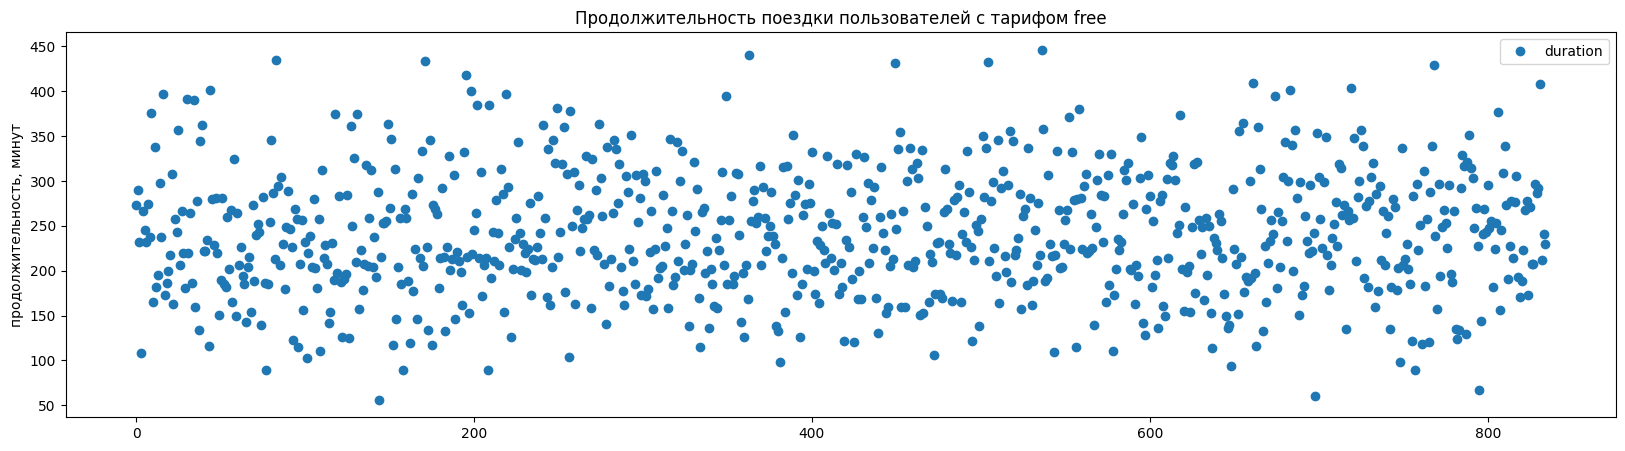

In [84]:
# продолжительность поездки пользователей с тарифом free
( data_users_rides_free[['duration']]
 .plot(style='o', figsize=(20, 5), title='Продолжительность поездки пользователей с тарифом free')
 .set_ylabel("продолжительность, минут")
);

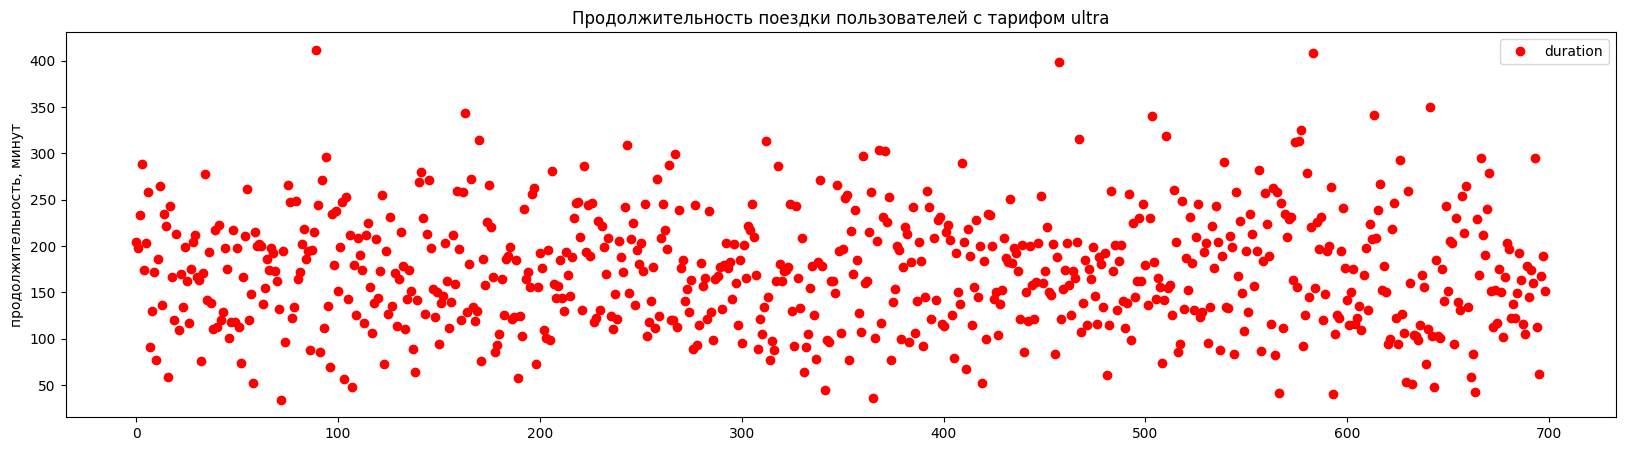

In [85]:
# продолжительность поездки пользователей с тарифом ultra
( data_users_rides_ultra[['duration']]
 .plot(style='o', color="red", figsize=(20, 5), title='Продолжительность поездки пользователей с тарифом ultra')
 .set_ylabel("продолжительность, минут")
);

**Вывод:** исхоодя из графиков можно сказать, что пользователи обеих категорий используют самокаты по времени и расстонию поездок схоже, без сильных отличий.

#### Шаг 5. Подсчёт выручки

##### Суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [88]:
df_users_rides

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [89]:
# проверка датафрейма на наличие пропусков
df_users_rides.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

In [90]:
# группировка пользователей с рассчетом сумарного расстояния, времени поездок и их количеству по каждому месяцу
df_users_rides_grouped = ( 
                            df_users_rides.groupby(['user_id', 'month', 'subscription_type']).
                                               agg({'distance':'sum', 'duration':'sum', 'user_id':'count'})
                         )

In [91]:
df_users_rides_grouped

distance   duration  user_id
user_id month subscription_type                                  
1       1     ultra               7027.511294  41.416640        2
        4     ultra                754.159807   6.232113        1
        8     ultra               6723.470560  44.776802        2
        10    ultra               5809.911100  31.578017        2
        11    ultra               7003.499363  53.397424        3
...                                       ...        ...      ...
1534    6     free                3409.468534  24.812678        2
        8     free                7622.453034  47.205960        2
        9     free                4928.173852  22.560373        1
        11    free               13350.015305  76.342174        4
        12    free                2371.711192  15.893917        1

[11331 rows x 3 columns]

In [92]:
# переименовываем столбец 'user_id' в 'count'
df_users_rides_grouped.columns = ['distance', 'duration', 'count']

In [93]:
# округляем длительность поездки с помощью «потолка»
df_users_rides_grouped['duration'] = np.ceil(df_users_rides_grouped['duration'])
# преобразуем расстояние в целочисленный формат
df_users_rides_grouped['distance'] = df_users_rides_grouped['distance'].apply(int)
# сброс мультииндекса
df_users_rides_grouped = df_users_rides_grouped.reset_index()

In [94]:
df_users_rides_grouped

,user_id,month,subscription_type,distance,duration,count
0,1,1,ultra,7027,42.0,2
1,1,4,ultra,754,7.0,1
2,1,8,ultra,6723,45.0,2
3,1,10,ultra,5809,32.0,2
4,1,11,ultra,7003,54.0,3
...,...,...,...,...,...,...
11326,1534,6,free,3409,25.0,2
11327,1534,8,free,7622,48.0,2
11328,1534,9,free,4928,23.0,1
11329,1534,11,free,13350,77.0,4


In [95]:
# для формулы расчета выручки по месяцам используем данные датафрейма по стоимости подписок:
subs_data

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [96]:
# копия среза по пользователям с подпиской free
df_temp_free = df_users_rides_grouped.query('subscription_type == "free"').copy()
# рассчет выручки
df_temp_free['income'] = subs_data.loc[0, 'start_ride_price']*df_temp_free['count'] + subs_data.loc[0, 'minute_price'] \
                        * df_temp_free['duration'] + subs_data.loc[0, 'subscription_fee']

In [97]:
df_temp_free

,user_id,month,subscription_type,distance,duration,count,income
4533,700,1,free,2515,15.0,1,170.0
4534,700,2,free,13446,86.0,5,938.0
4535,700,3,free,3798,19.0,1,202.0
4536,700,4,free,2984,16.0,1,178.0
4537,700,6,free,5927,29.0,2,332.0
...,...,...,...,...,...,...,...
11326,1534,6,free,3409,25.0,2,300.0
11327,1534,8,free,7622,48.0,2,484.0
11328,1534,9,free,4928,23.0,1,234.0
11329,1534,11,free,13350,77.0,4,816.0


In [98]:
# копия среза по пользователям с подпиской ultra
df_temp_ultra = df_users_rides_grouped.query('subscription_type == "ultra"').copy()
# рассчет выручки
df_temp_ultra['income'] = subs_data.loc[1, 'start_ride_price']*df_temp_ultra['count'] + subs_data.loc[1, 'minute_price'] \
                        * df_temp_ultra['duration'] + subs_data.loc[1, 'subscription_fee']

In [99]:
df_temp_ultra

,user_id,month,subscription_type,distance,duration,count,income
0,1,1,ultra,7027,42.0,2,451.0
1,1,4,ultra,754,7.0,1,241.0
2,1,8,ultra,6723,45.0,2,469.0
3,1,10,ultra,5809,32.0,2,391.0
4,1,11,ultra,7003,54.0,3,523.0
...,...,...,...,...,...,...,...
4528,699,6,ultra,4072,17.0,1,301.0
4529,699,8,ultra,7018,45.0,2,469.0
4530,699,9,ultra,6364,31.0,2,385.0
4531,699,10,ultra,4707,16.0,1,295.0


In [100]:
# чтобы не нарушать порядок индексов используем конкатенацию по строкам
df_final = pd.concat([df_temp_free, df_temp_ultra], axis=0)

In [101]:
df_final

,user_id,month,subscription_type,distance,duration,count,income
4533,700,1,free,2515,15.0,1,170.0
4534,700,2,free,13446,86.0,5,938.0
4535,700,3,free,3798,19.0,1,202.0
4536,700,4,free,2984,16.0,1,178.0
4537,700,6,free,5927,29.0,2,332.0
...,...,...,...,...,...,...,...
4528,699,6,ultra,4072,17.0,1,301.0
4529,699,8,ultra,7018,45.0,2,469.0
4530,699,9,ultra,6364,31.0,2,385.0
4531,699,10,ultra,4707,16.0,1,295.0


In [102]:
# отсортируем объединенный датафрейм по месяцам
df_final.sort_values(by='month')

,user_id,month,subscription_type,distance,duration,count,income
4533,700,1,free,2515,15.0,1,170.0
457,72,1,ultra,3713,33.0,1,397.0
5379,808,1,free,3301,34.0,2,372.0
3831,586,1,ultra,5815,43.0,2,457.0
9393,1298,1,free,3171,12.0,1,146.0
...,...,...,...,...,...,...,...
2235,344,12,ultra,1113,13.0,1,277.0
7263,1038,12,free,2778,25.0,1,250.0
7270,1039,12,free,8111,20.0,2,260.0
7223,1033,12,free,3365,26.0,1,258.0


In [103]:
# суммарная выручка за год
total_income = df_final['income'].sum()
total_income

3853677.0

#### Шаг 6. Проверка гипотез

##### Проверка гипотезы: тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки

In [104]:
# исходный массив данных
df_users_rides

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


Сформулируем гипотезу о том, что пользователи с подпиской (первая группа) тратят времени на поездки больше, чем пользователи без подписки (вторая группа).

Проверяем правосторонюю альтернативную гипотезу.

**Нулевая гипотеза:** средняя продолжительность поездки из двух групп одинаковы.

**Альтернативная гипотеза:** средняя продолжительность поездки первой группы больше, чем второй группы.

In [105]:
# продолжительность поездки первой группы пользователей (с подпиской)
first_group_total = df_users_rides.query('subscription_type == "ultra"')['duration']
# продолжительность поездки первой группы пользователей (без подписки)
second_group_total = df_users_rides.query('subscription_type == "free"')['duration']

In [106]:
# проверка на равенство двух выборок
if len(first_group_total) == len(second_group_total):
    print('выборки равны, используем equal_var = True')
else:
    print('выборки не равны, используем equal_var = False')        

выборки не равны, используем equal_var = False


In [107]:
alpha = 0.05 # уровень статистической значимости

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "больше"
results = st.ttest_ind(first_group_total, second_group_total, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.675781377128977e-37
Отвергаем нулевую гипотезу


Вывод: Полученное значение p-value меньше заданного уровня значимости, поэтому отвергаем нулевую гипотезу в пользу альтернативной. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Левостороняя гипотеза.

**Нулевая гипотеза:** Средняя поездка пользователя с подпиской ultra равна 3130 м.

**Альтернативная гипотеза:** Средняя поездка пользователя с подпиской ultra больше 3130 м.

In [108]:
# расстояние пользователей с подпиской ultra
df_distance_ultra = df_users_rides.query('subscription_type == "ultra"')['distance']

interested_value = 3130 # оптимальное значение износа самоката

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    df_distance_ultra, 
    interested_value,
    alternative='greater')

print('p-значение:', results.pvalue) # расчет значения p-value

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: дистанция значимо отличается от оптимального значения износа самоката')
else:
    print('Не получилось отвергнуть нулевую гипотезу: дистанция меньше оптимального значения износа самоката')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: дистанция меньше оптимального значения износа самоката


Вывод: на уровне значимости 0,05 принимаем гипотезу, что средняя дистанция пользователей с подпиской меньше оптимального значения износа самоката (3130 м).

##### Проверка гипотезы: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Нулевая гипотеза:** Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.

**Альтернативная гипотеза:** Помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.

In [109]:
# помесячная группировка суммарного дохода от пользователей с подпиской
df_income_ultra = df_temp_ultra.groupby(['month','user_id']).agg({'income':'sum'})
df_income_ultra

income
month user_id        
1     1         451.0
      3         277.0
      5         277.0
      7         367.0
      12        397.0
...               ...
12    688       343.0
      689       313.0
      692       289.0
      694       307.0
      699       355.0

[4533 rows x 1 columns]

In [110]:
# помесячная группировка суммарного дохода от пользователей без подписки
df_income_free = df_temp_free.groupby(['month','user_id']).agg({'income':'sum'})
df_income_free

income
month user_id        
1     700       170.0
      701       194.0
      702       178.0
      703       242.0
      704       194.0
...               ...
12    1525      322.0
      1526      234.0
      1528      138.0
      1532      428.0
      1534      178.0

[6798 rows x 1 columns]

In [111]:
alpha = 0.05 # уровень статистической значимости

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "больше"
results_income = st.ttest_ind(df_income_ultra, df_income_free, equal_var=False, alternative='greater')

print(f'p-value: {results_income.pvalue}')

# проверяем p-value
if results_income.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: [1.07187297e-44]
Отвергаем нулевую гипотезу


Вывод: Гипотезу о равенстве помесячной выручки пользовталей с подпиской и без подписки отвегаем на уровне значимости 0.05 в пользу альтернативной гипотезы - помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Это означает, что в среднем в 5 случаях из 100 мы отвергнем правильную гипотезу, т.е. совершим ошибку 1-го рода.

##### Какой тест понадобится  для проверки гипотезы о снижении кол-ва обращений в ТП после обновления сервиса.

Ответ: Статистический тест проводится дважды с одним и тем же наборов данных (парные выборки), и проверяется гипотеза, что истинное среднее генеральной совокупности до изменения больше, чем истинное среднее генеральной совокупности после изменения. В Python для таких измерений используется метод scipy.stats.ttest_rel с аргументом alternative='greater' (правостороняя гипотеза).

#### Шаг 7. Распределения

#### Общий вывод

Проведен анализ по предоставленным выборочным данным прокатного сервиса самокатов GoFast из нескольких городов. Исследовательский анализ показал:
- наиболее встречающийся в датасете город - Пятигорск, наименее встречающийся - Москва
- у сервиса хорошая база клиентов: пользователей без подписки всего на 8% больше, чем с подпиской
- услугами пользуются пользователи от 12 до 43 лет, средний возраст - 25 лет
- в среднем пользователь сервиса преодолевает примерно 3200 м за одну поездку
- средняя продолжительность поездки составляет 3.5 часа

Выручка за год по предоставленным данным за год с учетом стоимости тарифов составила 3 853 677 руб

Проведенный статистический анализ* показал:
1. гипотеза о тратах пользователей с подпиской больше времени на поездки, чем пользователей без подписки подтвержается.
2. гипотеза о средней дистанции пользователей с подпиской меньше 3130 м (оптимальное значение износа самоката) верна.
3. гипотеза о помесячной выручке от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки верна.

\*Все расчеты проводились на уровне значимости 5% - это означает, что в среднем в 5 случаях из 100 мы отвергнем правильную гипотезу, т.е. совершим ошибку 1-го рода.